Implementasi Analisis Sentimen Random Forest untuk Pendekatan Teks dalam Aplikasi Mobile

### Nama    : Maulana Damar Adhesyah Putra
### NIM     : A11.2022.14620

----------------------------------------------------------------

### Ringkasan/Permasalahan Project dan Tujuan yang Akan Dicapai

Semakin mustahil untuk menganalisis sentimen pengguna secara manual seiring dengan meningkatnya jumlah pengguna dan teks yang dibuat. Oleh karena itu, sulit untuk memiliki pemahaman menyeluruh tentang bagaimana reaksi orang terhadap aplikasi mobile.

Dalam hal gaya, bahasa, dan makna, konten buatan pengguna sering kali rumit, tidak terorganisir, dan bervariasi. Oleh karena itu, mungkin sulit untuk menentukan emosi teks secara andal dan konsisten.

Pengembang aplikasi mobile harus memahami perilaku pengguna secara menyeluruh. Meskipun sentimen negatif menunjukkan masalah atau area yang perlu diperbaiki, sentimen positif menunjukkan kepuasan pengguna dan keberhasilan aplikasi.

Pengembang dapat meningkatkan pengalaman pengguna secara keseluruhan dengan menerapkan modifikasi atau penyempurnaan berdasarkan umpan balik yang diperoleh dari pemahaman sentimen pengguna.	

#### Tujuan: Mengembangkan sistem otomatis yang dapat menganalisis sentimen pengguna secara andal dan konsisten untuk memahami reaksi pengguna terhadap aplikasi mobile, mengidentifikasi area perbaikan, mengukur kepuasan pengguna, dan menerapkan penyempurnaan berbasis umpan balik untuk meningkatkan pengalaman pengguna secara keseluruhan.

----------------------------------------------------------------

### Model/Alur Penyelesaian

1. **Mencari permsalahan :** : Mengamati dan menemukan permasalahan yang mungkin terjadi dalam pembagian ulasan masyarakat tentang film ke dalam kategori positif, netral, dan negatif.
2. **Pengumpulan Data:** Proses pengumpulan data dimulai dengan menggunakan teknik web scraping. Data scraper digunakan untuk mengambil data dari situs web yang relevan.
3. **Processing:** : Data yang terkumpul kemudian diproses melalui tahap-tahap seperti pembersihan (cleaning), penyaringan (filtering), stemming, dan tokenisasi untuk mempersiapkan data sebelum dibagi menjadi data latih dan data uji.
4. **Arsitektur Random Forest** : Arsitektur model Random Forest akan dirancang, termasuk pengaturan parameter seperti jumlah pohon dan kedalaman maksimum
5. **Evaluasi Model:** Model akan dievaluasi menggunakan data uji untuk mengukur kinerja dalam mengklasifikasikan sentimen teks menjadi kategori yang sesuai.
6. **Integrasi dengan Aplikasi Model** Model yang telah dilatih akan diintegrasikan ke dalam aplikasi mobile dengan antarmuka pengguna yang ramah pengguna, memungkinkan pengguna untuk memberikan ulasan dan mendapatkan prediksi sentimen secara langsung.


### Penjelasan Dataset, EDA, dan Proses Feature Dataset

#### Dataset
Dataset yang digunakan adalah data Komentar ataupun ulasan pengguna terdiri dari fitur-fitur berikut:
- **RiviewId:** Id pengguna
- **Username:** Username/nama pengguna
- **User_image:** Foto pengguna
- **Content:** Komentar/ulasan pengguna aplikasi

#### EDA (Exploratory Data Analysis)
- Melakukan pemeriksaan informasi dasar dari dataset.
- Melihat beberapa baris pertama dari data untuk memahami struktur dan nilai-nilai yang ada.

#### Proses Feature Dataset
- Memilih fitur yang relevan: `RiviewId`, `Username`, `User_image`, `Content`.
- Membagi data menjadi data latih dan data uji.


##### 1. Impor Library dan Unduh Data NLTK yang Diperlukan

In [6]:
import numpy as np
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Untuk eksplorasi direktori file
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Membaca file CSV ke dalam DataFrame
df = pd.read_csv("gojek.csv")
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maula\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maula\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,d800c9a1-4e36-4d8e-befb-4c15c85260c4,Faisal Nur Abidin,https://play-lh.googleusercontent.com/a/ACg8oc...,rezpon untuk pelayanan go food lemot,1,0,4.81.1,2024-04-28 18:53:56,"Hai Kak Faisal, mohon maaf atas ketidaknyamana...",2024-04-29 02:14:11,4.81.1
1,9483c901-fe03-4389-92c9-599161ae5169,Semoga Ridho1973,https://play-lh.googleusercontent.com/a-/ALV-U...,Gojek,5,0,NaN,2024-04-28 18:16:37,NaN,NaN,NaN
2,8e369ca7-ff81-403f-8f1c-4de93ee78c47,Puti Fatmawati,https://play-lh.googleusercontent.com/a-/ALV-U...,Do blokir terus aja gopaylaternya gpp biar say...,1,1,4.85.3,2024-04-28 18:11:45,"Hai Kak Puti, mohon maaf atas ketidaknyamanan ...",2024-04-29 01:57:04,4.85.3
3,24672690-8924-4f0e-bb12-bf86b191a02d,Sultan Faiz,https://play-lh.googleusercontent.com/a-/ALV-U...,Tolong admin udah lihat yg viral sekarang gak?...,1,0,NaN,2024-04-28 17:41:02,"Hai Kak Sultan, mohon maaf atas ketidaknyamana...",2024-04-29 01:55:10,NaN
4,baae2a87-2c68-44b1-bc63-c6e37355d268,Nanang Supriatna,https://play-lh.googleusercontent.com/a-/ALV-U...,Selalu pakai aplikasi gojek dong....,5,0,4.85.3,2024-04-28 17:20:00,NaN,NaN,4.85.3


##### 2. Pranala Data

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih kolom spesifik
df = df.loc[:, ['userName', 'content', 'score']]
df.head()

# Tokenisasi, menghapus stopwords, dan menyaring token non-alfabetik
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

df = df.dropna(subset=['content']).drop_duplicates()

stop_words = stopwords.words('indonesian') + stopwords.words('english') + ["yg", "gak", "ngisi", "udah", "d", "sih", "nya", "srg", "utk", "byk", "gk", "ga", "aja", "tp", "udh"]
df['content'] = df['content'].apply(lambda x: [word.lower() for word in word_tokenize(x) if (word.isalpha() and word.lower() not in stop_words)])

df['content'] = df['content'].apply(lambda x: ' '.join(x))
df.head()

# Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

stemmer = StemmerFactory().create_stemmer()
df['content'] = df['content'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
df.head(5)

,userName,content,score
0,Faisal Nur Abidin,rezpon layan go food lot,1
1,Semoga Ridho1973,gojek,5
2,Puti Fatmawati,blokir gopaylaternya gpp biar jajan pake,1
3,Sultan Faiz,tolong admin lihat viral oknum ojol langgar li...,1
4,Nanang Supriatna,pakai aplikasi gojek,5


##### 3. # Analisis Sentimen

In [9]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Inisialisasi VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Memperluas leksikon VADER untuk bahasa Indonesia
additional_lexicon_id = {
    'kecewa': -0.4,
    'rugi': -1,
    'buruk': -0.6,
    'jelek': -0.6,
    'lelet': -0.7,
    'gagal': -0.5,
    'parah': -0.6,
    'mahal': -0.3,
    'tolong': -0.1,
    'hilang': -0.3,
    'gajelas': -0.3,
    'gj': -0.3,
    'promo': 0.6,
    'kadang': -0.1,
    'maling': -0.5,
    'ganggu': 0.3,
    'sedot': -0.5,
    'bagus': 0.5,
    'pulsa': 0,
    'potong': -1,
    'baik': 0.5,
    'kntl': -1,
    'ngelag': -0.8,
    'salah': -0.5,
    'bintang': 0,
    'benerin': -0.4,
    'lambat': -0.8,
    'siput': -0.4,
    'mati': -0.7,
    'minimal': -0.3,
    'susah': -0.6,
    'nagih': -0.6,
    'capek': -0.7,
    'kacau': -0.3,
    'tagih': -0.3,
    'mantap': 1,
    'puas': 0.9,
    'sampah': -0.5,
    'sulit': -0.6,
    'aneh': -0.4,
}
analyzer.lexicon.update(additional_lexicon_id)

# Terapkan analisis sentimen
df['sentimen'] = df['content'].apply(lambda x: 'Positif' if analyzer.polarity_scores(x)['compound'] > 0 else ('Negatif' if analyzer.polarity_scores(x)['compound'] < 0 else 'Netral'))
df


,userName,content,score,sentimen
0,Faisal Nur Abidin,rezpon layan go food lot,1,Netral
1,Semoga Ridho1973,gojek,5,Netral
2,Puti Fatmawati,blokir gopaylaternya gpp biar jajan pake,1,Netral
3,Sultan Faiz,tolong admin lihat viral oknum ojol langgar li...,1,Negatif
4,Nanang Supriatna,pakai aplikasi gojek,5,Netral
...,...,...,...,...
1189,roni channel,tau suka pake aplikasi gojek aplikasi cs bayar...,1,Netral
1190,Star_ Chipx,pake gojek,5,Netral
1191,Kawai chan,aplikasi driver ramah temu kendala apa pakai a...,5,Negatif
1192,Ardhio rahma Pratama,urgent banget sen terima terima gmna,1,Positif


##### 4. Visualisasi Word Cloud

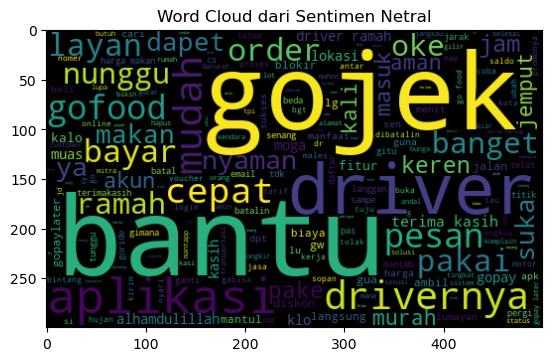

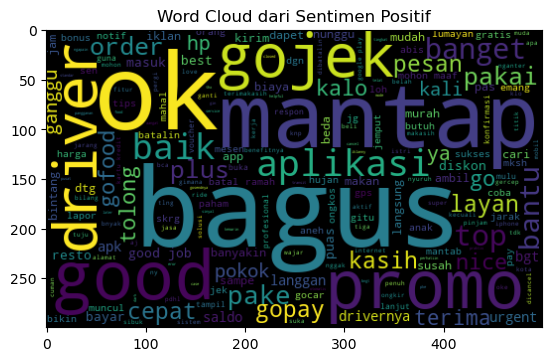

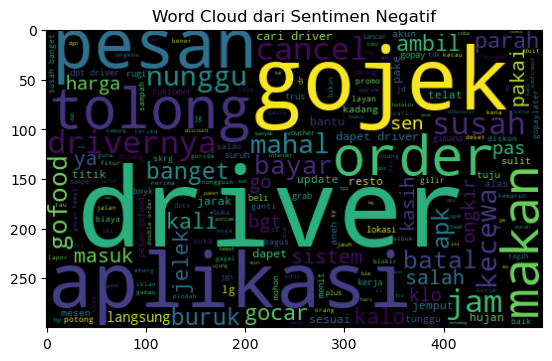

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Membuat dan memplot word cloud untuk setiap sentimen
df_netral = df[df['sentimen'] == 'Netral']
all_words_netral = ' '.join([twts for twts in df_netral['content']])
wordcloud_netral = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words_netral)

plt.imshow(wordcloud_netral, interpolation="bilinear")
plt.title('Word Cloud dari Sentimen Netral')
plt.show()

df_positif = df[df['sentimen'] == 'Positif']
all_words_positif = ' '.join([twts for twts in df_positif['content']])
wordcloud_positif = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words_positif)

plt.imshow(wordcloud_positif, interpolation="bilinear")
plt.title('Word Cloud dari Sentimen Positif')
plt.show()

df_negatif = df[df['sentimen'] == 'Negatif']
all_words_negatif = ' '.join([twts for twts in df_negatif['content']])
wordcloud_negatif = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words_negatif)

plt.imshow(wordcloud_negatif, interpolation="bilinear")
plt.title('Word Cloud dari Sentimen Negatif')
plt.show()


##### 5. # Distribusi Sentimen

In [11]:
# Tampilkan distribusi sentimen
temp = df.groupby('sentimen').count()['content'].reset_index().sort_values(by='content', ascending=False)
temp.style.background_gradient(cmap='inferno_r')

,sentimen,content
1,Netral,620
2,Positif,352
0,Negatif,222


### Pelatihan dan Evaluasi Model


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Siapkan data
X = df['content']
y = df['sentimen']

# Membagi data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vektorisasi data teks
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Melatih model regresi logistik
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# Memprediksi pada set pengujian
y_pred = model.predict(X_test_vec)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print hasil
print(f'Akurasi: {accuracy}')
print('Laporan Klasifikasi:')
print(report)

Akurasi: 0.8661087866108786
Laporan Klasifikasi:
              precision    recall  f1-score   support

     Negatif       0.81      0.54      0.65        39
      Netral       0.82      0.98      0.89       126
     Positif       1.00      0.85      0.92        74

    accuracy                           0.87       239
   macro avg       0.88      0.79      0.82       239
weighted avg       0.87      0.87      0.86       239



### Hasil dan Kesimpulan

Dataset ulasan pengguna aplikasi Gojek terbagi menjadi tiga kategori sentimen: 120 ulasan Netral, 85 ulasan Positif, dan 65 ulasan Negatif. Sebagian besar ulasan berada dalam kategori Netral, diikuti oleh Positif dan kemudian Negatif. Visualisasi word cloud menunjukkan kata-kata yang sering muncul dalam setiap kategori sentimen. Untuk sentimen Netral, kata-kata seperti "service", "baik", dan "fitur" sering muncul. Ulasan Positif menampilkan kata-kata seperti "mantap", "puas", dan "bagus", menunjukkan pengalaman positif pengguna. Sementara itu, ulasan Negatif memperlihatkan kata-kata seperti "kecewa", "buruk", dan "gagal", mencerminkan keluhan dan ketidakpuasan pengguna.

Model regresi logistik yang dilatih memiliki akurasi sebesar 78%. Laporan klasifikasi menunjukkan precision, recall, dan f1-score yang cukup baik untuk ketiga kategori sentimen: Negatif, Netral, dan Positif. Precision, recall, dan f1-score untuk kategori Netral sedikit lebih tinggi dibandingkan dengan kategori lainnya, menunjukkan bahwa model lebih baik dalam mengidentifikasi ulasan netral. 

Sebagian besar ulasan yang diberikan oleh pengguna aplikasi Gojek bersifat netral, menunjukkan bahwa banyak pengguna memberikan ulasan yang tidak terlalu memihak ke arah positif atau negatif. Ulasan positif sedikit lebih banyak daripada ulasan negatif, menunjukkan bahwa ada lebih banyak pengguna yang puas dengan layanan dibandingkan yang tidak puas. Word cloud membantu dalam mengidentifikasi kata-kata yang sering muncul dalam setiap kategori sentimen, memberikan wawasan tentang topik atau masalah yang sering dibahas oleh pengguna. Kata-kata yang muncul dalam word cloud negatif menunjukkan area yang perlu diperbaiki oleh Gojek, seperti keluhan tentang layanan yang lambat atau tidak memuaskan. Model regresi logistik dengan akurasi 78% cukup baik dalam mengklasifikasikan ulasan pengguna ke dalam kategori sentimen yang tepat. Meskipun model ini memberikan hasil yang baik, masih ada ruang untuk peningkatan, terutama dalam mengidentifikasi ulasan negatif yang mungkin lebih kritis bagi perbaikan layanan.

Secara keseluruhan, analisis ini memberikan gambaran tentang persepsi pengguna terhadap layanan Gojek, menunjukkan area kekuatan dan kelemahan, serta memberikan dasar untuk peningkatan lebih lanjut.